# Random Forests

If you aggregate the predictions of a group of predictors (such as classifiers or regressors), you will often get better predictions than with the best individual predictor. A group of predictors is called an *ensemble*; thus, this technique is called *ensemble learning*, and an ensemble learning algorithm is called an *ensemble method*.

As an example of an ensemble method, you can train a group of decision tree classifiers, each on a different random subset of the training set. You can then obtain the predictions of all the individual trees, and the class that gets the most votes is the ensemble’s prediction. Such an ensemble of decision trees is called a *random forest*.

Although random forests don’t offer the same level of interpretability as decision trees, a big advantage of random forests is that we don’t have to worry so much about choosing good hyperparameter values. We typically don’t need to prune the random forest since the ensemble model is quite robust to noise from averaging the predictions among the individual decision trees. The only parameter that we need to care about in practice is the number of trees, k, that we choose for the random forest. Typically, the larger the number of trees, the better the performance of the random forest classifier at the expense of an increased computational cost.

### Feature Importance

Scikit-Learn measures a feature’s importance by looking at how much the tree nodes that use that feature reduces impurity on average, across all trees in the forest. More precisely, it is a weighted average, where each node’s weight is equal to the number of training samples that are associated with it (see the `feature_importances_` attribute).

Scikit-Learn computes this score automatically for each feature after training, then it scales the results so that the sum of all importances is equal to 1.

### Examples - Random Forest classification

#### Example 1 - Random Forests classification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv("./data/penguins.csv")

In [64]:
df = df.dropna()
df.drop(['Unnamed: 0', 'year'],axis=1,inplace=True)


KeyError: "['Unnamed: 0', 'year'] not found in axis"

In [66]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


In [67]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
model = RandomForestClassifier(n_estimators=10,random_state=101)

In [72]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [73]:
preds = model.predict(X_test)

In [74]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,ConfusionMatrixDisplay

In [75]:
confusion_matrix(y_test,preds)

array([[40,  0,  0],
       [ 0, 19,  0],
       [ 0,  0, 41]])

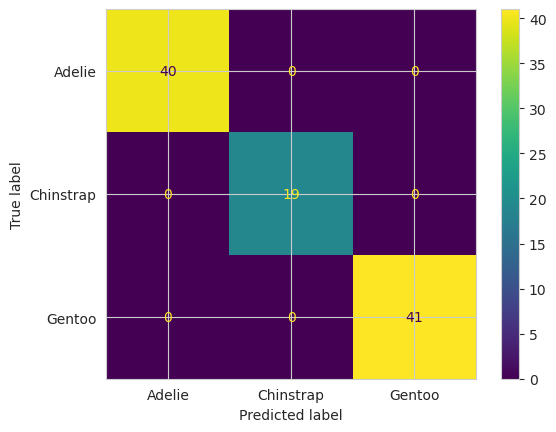

In [76]:
ConfusionMatrixDisplay(confusion_matrix(y_test,preds),display_labels=model.classes_).plot()

In [77]:
model.feature_importances_

array([0.36432091, 0.09553661, 0.20559243, 0.19993182, 0.11150935,
       0.01438063, 0.00872825])

In [78]:
test_error = []

for n in range(1,38):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))

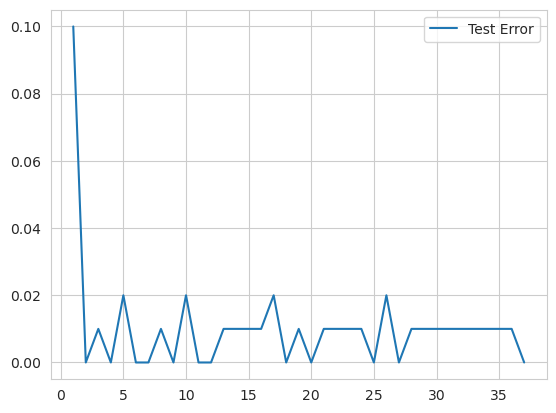

In [79]:
plt.plot(range(1,38),test_error,label='Test Error')
plt.legend()

#### Example 2 - Random Forests classification

In [80]:
df = pd.read_csv("./data/data_banknote_authentication.csv")

In [81]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


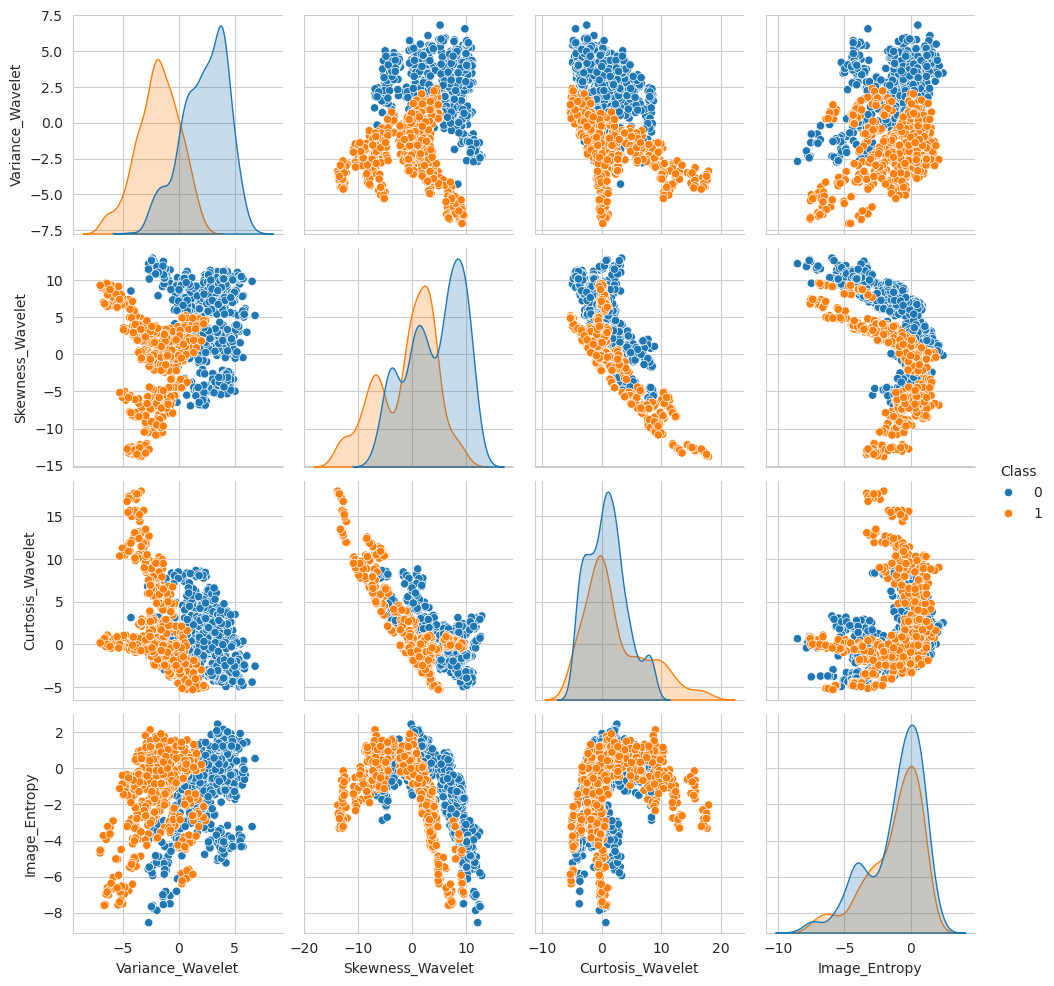

In [82]:
sns.pairplot(df,hue='Class')

In [83]:
X = df.drop("Class",axis=1)
y = df['Class']

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [117]:
from sklearn.model_selection import GridSearchCV

In [120]:
param_grid = [
    {'n_estimators': [64, 100, 128, 200], 'max_features': [2, 3, 4], 'bootstrap': [True], 'oob_score': [True]},
    {'n_estimators': [64, 100, 128, 200], 'max_features': [2, 3, 4], 'bootstrap': [False], 'oob_score': [False]}
]

In [121]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [122]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'bootstrap': [True], 'max_features': [2, 3, 4],
                          'n_estimators': [64, 100, 128, 200],
                          'oob_score': [True]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [64, 100, 128, 200],
                          'oob_score': [False]}])

In [123]:
grid.best_params_

{'bootstrap': False,
 'max_features': 2,
 'n_estimators': 100,
 'oob_score': False}

In [124]:
predictions = grid.predict(X_test)

In [125]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       124
           1       0.99      1.00      0.99        82

    accuracy                           1.00       206
   macro avg       0.99      1.00      0.99       206
weighted avg       1.00      1.00      1.00       206



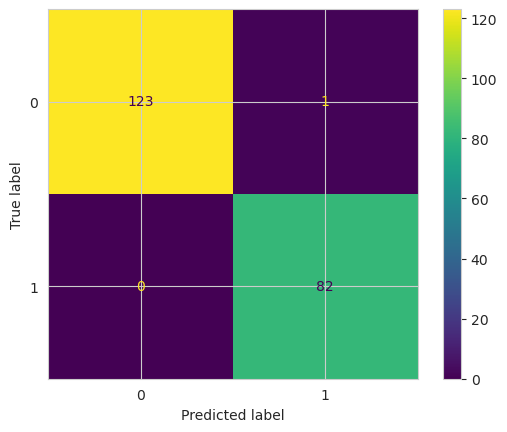

In [126]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)

In [113]:
grid.best_estimator_.oob_score

True

In [114]:
grid.best_estimator_.oob_score_

0.9947916666666666

In [127]:
from sklearn.metrics import accuracy_score

In [128]:
errors = []
misclassifications = []

for n in range(1,64):
    rfc = RandomForestClassifier( n_estimators=n,bootstrap=True,max_features= 2)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(preds,y_test)
    n_missed = np.sum(preds != y_test) # watch the video to understand this line!!
    errors.append(err)
    misclassifications.append(n_missed)

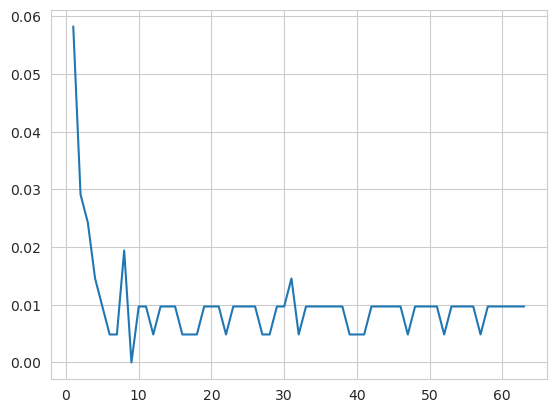

In [129]:
plt.plot(range(1,64),errors,label='Error Rate')

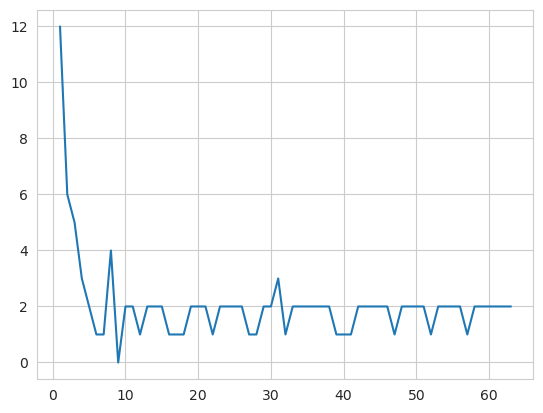

In [130]:
plt.plot(range(1,64),misclassifications,label='Misclassifications')

### Examples - Random Forest regression

#### Example 1 - Random Forests regression

In [131]:
df = pd.read_csv("./data/rock_density_xray.csv")

In [132]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [133]:
df.columns=['Signal',"Density"]

<Axes: xlabel='Signal', ylabel='Density'>

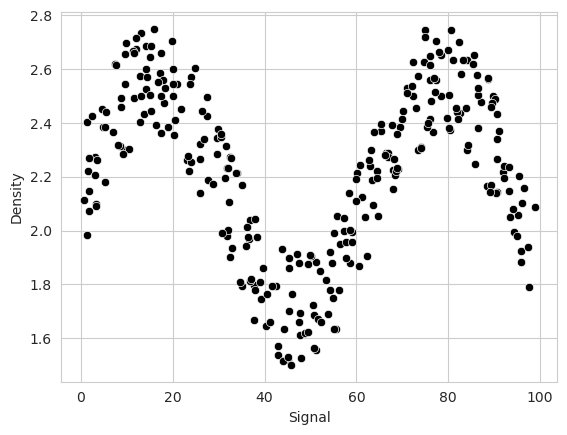

In [173]:
sns.scatterplot(x='Signal',y='Density',data=df, color='k')

In [137]:
X = df['Signal'].values.reshape(-1, 1)
y = df['Density']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [138]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [139]:
lm_preds = linear_model.predict(X_test)

In [141]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,lm_preds))

np.float64(0.2570051996584629)

In [142]:
signal_range = np.arange(0,100)

In [146]:
lm_output = linear_model.predict(signal_range.reshape(-1,1))

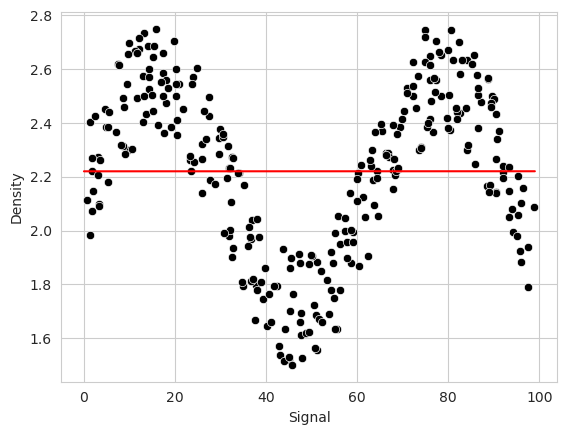

In [155]:
sns.scatterplot(x='Signal',y='Density',data=df, color='k')
plt.plot(signal_range,lm_output,'r')

In [150]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [156]:
def run_model(model,X_train,y_train,X_test,y_test):

    # Fit Model
    model.fit(X_train,y_train)

    # Get Metrics

    preds = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')

    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))

    sns.scatterplot(x='Signal',y='Density',data=df, color='k')
    plt.plot(signal_range,output)
    plt.show()

RMSE : 0.2570051996584629


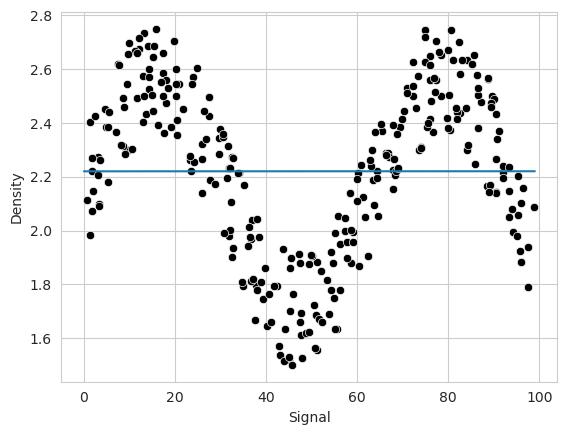

In [157]:
run_model(model,X_train,y_train,X_test,y_test)

In [158]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(PolynomialFeatures(2),LinearRegression())

RMSE : 0.2817309563725596


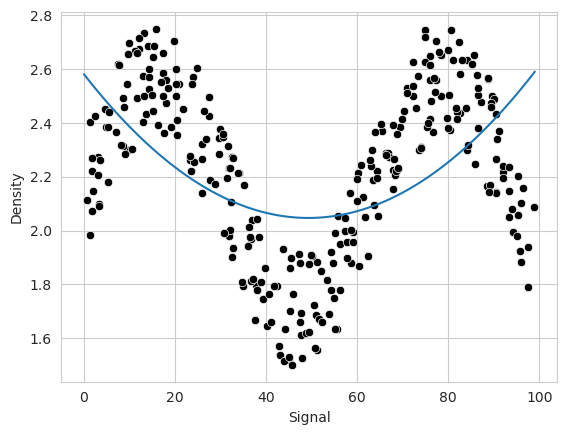

In [159]:
run_model(pipe,X_train,y_train,X_test,y_test)

RMSE : 0.16269005292989244


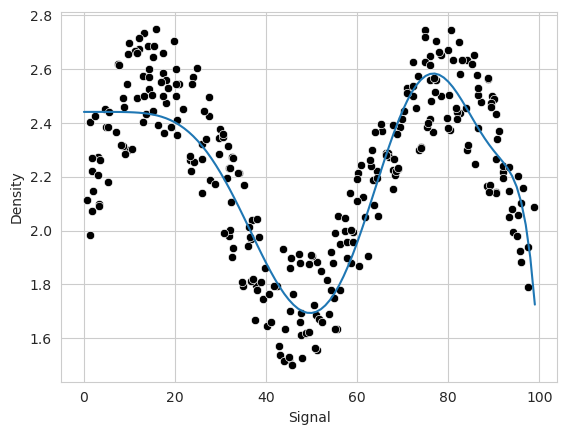

In [160]:
pipe = make_pipeline(PolynomialFeatures(10),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

In [161]:
from sklearn.neighbors import KNeighborsRegressor

RMSE : 0.1523487028635337


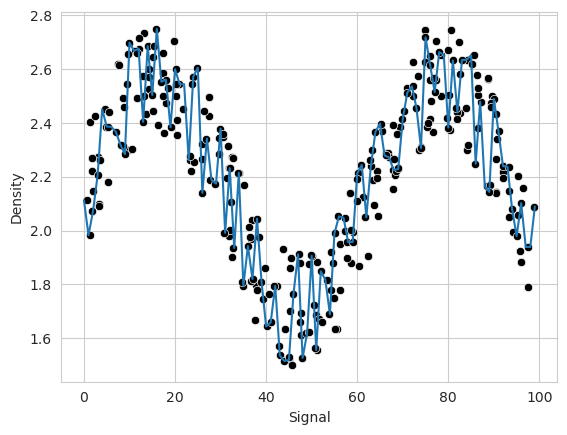

RMSE : 0.13730685016923647


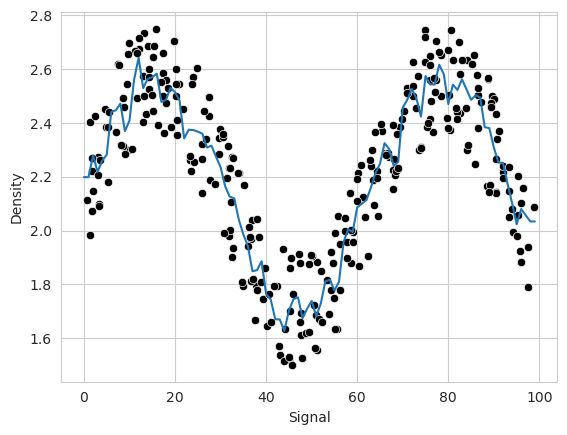

RMSE : 0.13277855732740926


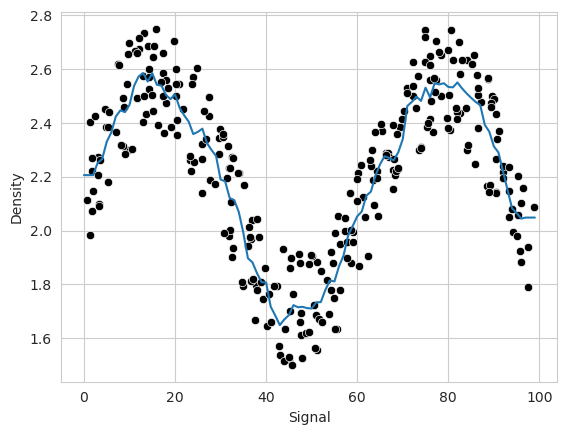

In [162]:
preds = {}
k_values = [1,5,10]
for n in k_values:


    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

RMSE : 0.1523487028635337


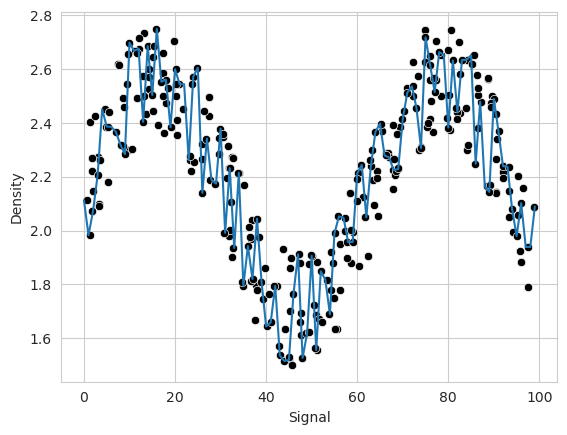

In [163]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

run_model(model,X_train,y_train,X_test,y_test)

In [164]:
model.get_n_leaves()

np.int64(270)

RMSE : 0.12646999302047557


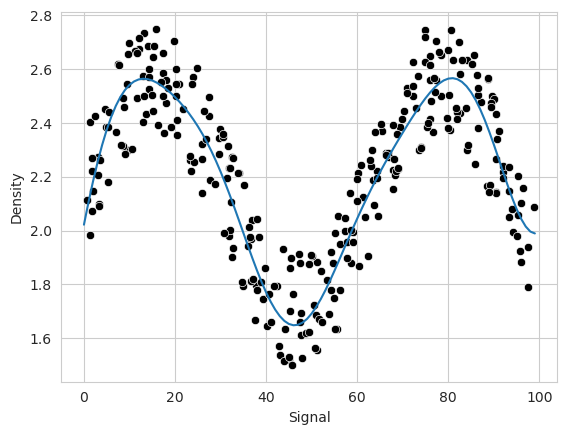

In [165]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()
grid = GridSearchCV(svr,param_grid)
run_model(grid,X_train,y_train,X_test,y_test)

In [166]:
grid.best_estimator_

SVR(C=1000)

In [167]:
from sklearn.ensemble import RandomForestRegressor

RMSE : 0.1300754133258493


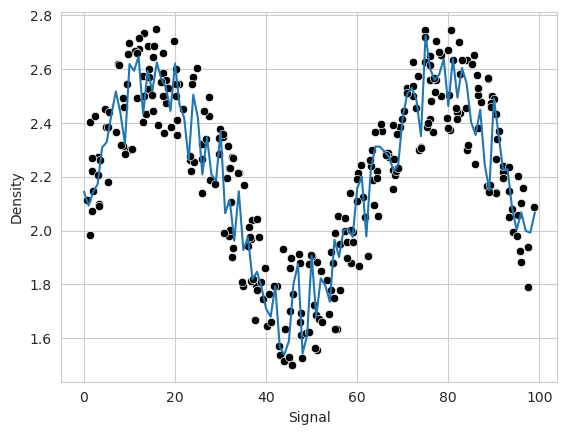

RMSE : 0.1327413434850403


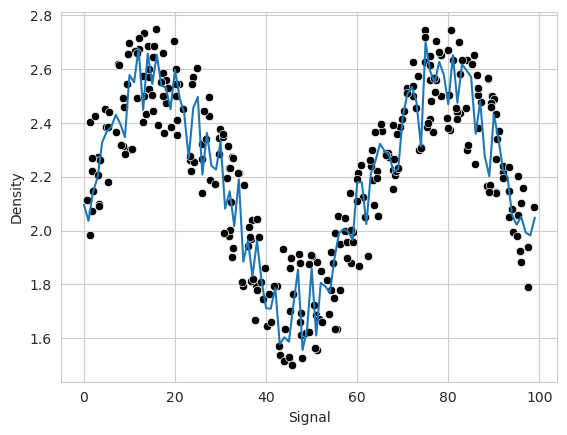

RMSE : 0.13131369696983222


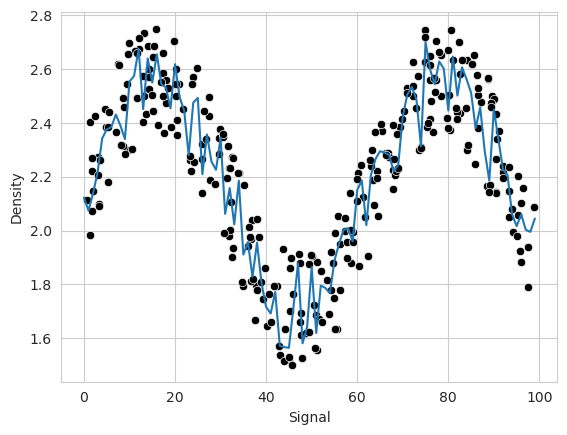

In [168]:
trees = [10,50,100]
for n in trees:

    model = RandomForestRegressor(n_estimators=n)

    run_model(model,X_train,y_train,X_test,y_test)

In [169]:
from sklearn.ensemble import GradientBoostingRegressor

RMSE : 0.13294148649584667


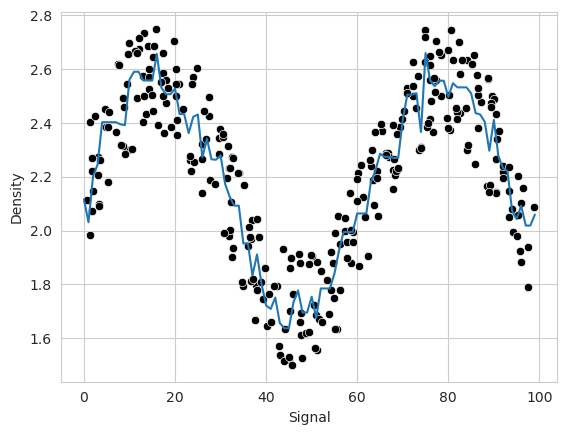

In [170]:
model = GradientBoostingRegressor()
run_model(model,X_train,y_train,X_test,y_test)

RMSE : 0.1332828470978743


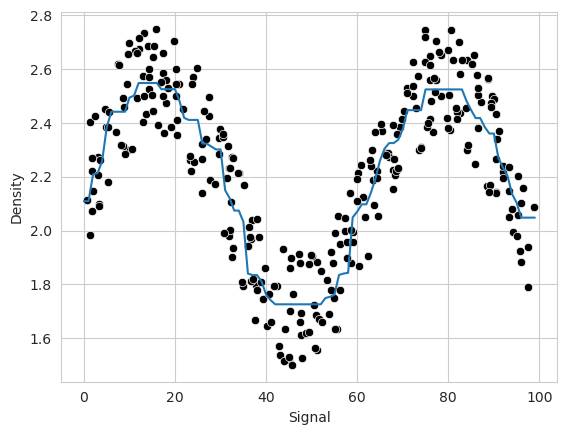

In [174]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
run_model(model,X_train,y_train,X_test,y_test)